In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import os
import util
import matplotlib.pyplot as plt
from sklearn import metrics, tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, _tree
from scipy.cluster import hierarchy
from six import StringIO
from IPython.display import Image
import pydotplus

## Download data

In [2]:
# Get the current working directory
directory = os.getcwd()

# Load data
directory_data = directory + '\\Data\\sfo 2018_data file_final_Weighted.xlsx'
data_2018 = pd.read_excel(directory_data, engine='openpyxl', sheet_name='DATA')
code_list_2018 = pd.read_excel(directory_data, engine='openpyxl', sheet_name='Code List')

## Get to know data

In [3]:
len(data_2018)

2809

In [4]:
data_2018.head()

,RESPNUM,CCGID,RUNID,INTDATE,DAY,GATE,BAREA,STRATA,PEAK,METH,...,HOME,Q19Clear,Q20Age,Q21Gender,Q22Income,Q23FLY,Q24SJC,Q24OAK,LANG,WEIGHT
0,1842,1680,552,21,2,102,G,3,3,1,...,15,2,6,2,0,0,2,2,1,0.670484
1,1844,1681,552,21,2,102,G,3,3,1,...,15,2,4,1,2,1,2,2,1,0.670484
2,1840,1678,552,21,2,102,G,3,3,1,...,15,1,5,1,5,2,2,2,1,0.670484
3,1837,1676,552,21,2,102,G,3,3,1,...,15,2,2,2,3,3,2,1,1,0.670484
4,1833,1674,552,21,2,102,G,3,3,1,...,15,2,2,2,2,2,2,2,1,0.670484


In [5]:
data_2018.describe()

,RESPNUM,CCGID,INTDATE,DAY,GATE,STRATA,PEAK,METH,SAQ,FLIGHT,...,HOME,Q19Clear,Q20Age,Q21Gender,Q22Income,Q23FLY,Q24SJC,Q24OAK,LANG,WEIGHT
count,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,...,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000
mean,1821.937700,1419.065504,14.079032,4.127447,50.647205,2.148095,2.161979,1.012460,1.880384,1414.961552,...,18.608046,1.657529,4.045568,1.448558,2.046992,1.817017,1.595586,1.541118,1.103596,0.999999
std,942.654669,861.370970,8.193408,1.692994,33.241023,0.780914,0.750427,0.125978,0.324569,1714.986966,...,26.604692,0.730039,1.864170,0.611737,1.493790,0.700515,0.678995,0.697855,0.442109,0.490976
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.208038
25%,1052.000000,707.000000,8.000000,3.000000,12.000000,2.000000,2.000000,1.000000,2.000000,394.000000,...,7.000000,2.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.670484
50%,1869.000000,1409.000000,15.000000,4.000000,52.000000,2.000000,2.000000,1.000000,2.000000,857.000000,...,10.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.061139
75%,2594.000000,2116.000000,20.000000,5.000000,81.000000,3.000000,3.000000,1.000000,2.000000,1747.000000,...,14.000000,2.000000,6.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.486925
max,9004.000000,9004.000000,31.000000,7.000000,102.000000,3.000000,3.000000,3.000000,2.000000,8839.000000,...,99.000000,2.000000,7.000000,3.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.887528


In [6]:
data_2018.columns

Index(['RESPNUM', 'CCGID', 'RUNID', 'INTDATE', 'DAY', 'GATE', 'BAREA',
       'STRATA', 'PEAK', 'METH', 'SAQ', 'AIRLINE', 'DESTINATION', 'FLIGHT',
       'AIRLINE_CODE', 'DEST_CODE', 'DESTGEO', 'DESTMARK', 'ARRTIME',
       'DEPTIME', 'HOWLONG', 'Q2PURP1', 'Q2PURP2', 'Q2PURP3', 'Q3GETTO1',
       'Q3GETTO2', 'Q3GETTO3', 'Q3PARK', 'Q4BAGS', 'Q4STORE', 'Q4FOOD',
       'Q4WIFI', 'Q5TIMESFLOWN', 'Q5FIRSTTIME', 'Q6LONGUSE', 'Q7ART', 'Q7FOOD',
       'Q7STORE', 'Q7SIGN', 'Q7WALKWAY', 'Q7SCREENS', 'Q7INFODOWN', 'Q7INFOUP',
       'Q7WIFI', 'Q7ROADS', 'Q7PARK', 'Q7AIRTRAIN', 'Q7LTPARKING', 'Q7RENTAL',
       'Q7ALL', 'Q8-1', 'Q8-2', 'Q8-3', 'Q8-4', 'Q8-5', 'Q8-6', 'Q9Boarding',
       'Q9AirTrain', 'Q9Rental', 'Q9Food', 'Q9Restroom', 'Q9All', 'Q9-1',
       'Q9-2', 'Q9-3', 'Q10Safe', 'Q10-1', 'Q10-2', 'Q10-3', 'Q11TSAPRE',
       'Q12PRECHECKRATE', 'Q12-1', 'Q12-2', 'Q12-3', 'Q13COUNTY', 'Q13GETRATE',
       'Q14FIND ', 'Q14PASSTHRU', 'Q15PROBLEM', 'Q15A', 'Q15-1', 'Q15-2',
       'Q15-3', 'N

In [7]:
data_2018.rename(columns = {'NETPRO  ':'NETPRO'}, inplace = True)
data_2018.rename(columns = {'Q14FIND ':'Q14FIND'}, inplace = True)

### Null varaibles

In [8]:
# Variable with null
columns_null = ['Q2PURP2', 'Q2PURP3', 'Q3GETTO2', 'Q3GETTO3', 'Q3PARK', 'Q8-2', 'Q8-3', 'Q8-4', 'Q8-5', 'Q8-6', 'Q9-2', 'Q9-3', 'Q10-2', 'Q10-3', 'Q12PRECHECKRATE', 'Q12-1', 'Q12-2', 'Q12-3', 'Q15A', 'Q15-1', 'Q15-2', 'Q15-3', 'Q18CITY', 'Q18COUNTY', 'Q18ZIP', 'Q18STATE', 'Q18COUNTRY']
data_2018.isnull().sum()

RESPNUM    0
CCGID      0
RUNID      0
INTDATE    0
DAY        0
          ..
Q23FLY     0
Q24SJC     0
Q24OAK     0
LANG       0
WEIGHT     0
Length: 100, dtype: int64

In [9]:
# Variable with hidden null as 0
columns_0 = ['Q2PURP1', 'Q4BAGS', 'Q4STORE', 'Q4FOOD', 'Q4WIFI', 'Q5TIMESFLOWN', 'Q5FIRSTTIME', 'Q6LONGUSE', 'Q7ART', 'Q7FOOD', 'Q7STORE', 'Q7SIGN', 'Q7WALKWAY', 'Q7SCREENS', 'Q7INFODOWN', 'Q7INFOUP', 'Q7WIFI', 'Q7ROADS', 'Q7PARK', 'Q7AIRTRAIN', 'Q7LTPARKING', 'Q7RENTAL', 'Q8-1', 'Q9Boarding', 'Q9AirTrain', 'Q9Rental', 'Q9Food', 'Q9Restroom', 'Q9All', 'Q10Safe', 'Q10-1', 'Q11TSAPRE', 'Q13GETRATE', 'Q14FIND', 'Q14PASSTHRU', 'Q15PROBLEM',  'Q17LIVE', 'Q19Clear', 'Q20Age', 'Q21Gender', 'Q22Income', 'Q23FLY', 'Q24SJC', 'Q24OAK']
print(pd.unique(data_2018['Q24OAK']))

[2 1 0 3]


In [10]:
# Variable with hidden null as BLANK - 'Q7ALL'
data_2018.loc[data_2018['Q7ALL'] == 'BLANK', 'Q7ALL'] = 0
# Variable with hidden null as N - 'HOWLONG', 'ARRTIME', 'DEPTIME'
data_2018.loc[data_2018['HOWLONG'] == 'N', 'HOWLONG'] = 0
data_2018.loc[data_2018['ARRTIME'] == 'N', 'ARRTIME'] = 0
data_2018.loc[data_2018['DEPTIME'] == 'N', 'DEPTIME'] = 0
# Variable with hidden null as 11 - 'NETPRO'
data_2018.loc[data_2018['NETPRO'] == 11, 'NETPRO'] = 0
# Variable with hidden null as 99 - 'HOME'
data_2018.loc[data_2018['HOME'] == 99, 'HOME'] = 0
columns_0.extend(['Q7ALL', 'HOWLONG', 'ARRTIME', 'DEPTIME', 'NETPRO', 'HOME'])

In [11]:
# Columns without null values
columns_not_null = data_2018.columns.copy().drop(columns_null + columns_0)
columns_not_null

Index(['RESPNUM', 'CCGID', 'RUNID', 'INTDATE', 'DAY', 'GATE', 'BAREA',
       'STRATA', 'PEAK', 'METH', 'SAQ', 'AIRLINE', 'DESTINATION', 'FLIGHT',
       'AIRLINE_CODE', 'DEST_CODE', 'DESTGEO', 'DESTMARK', 'Q3GETTO1', 'Q9-1',
       'Q13COUNTY', 'LANG', 'WEIGHT'],
      dtype='object')

In [12]:
# Number of records after dropping all hidden null records
data_2018_not_null = data_2018.copy()
for col in columns_0 + columns_null:
    data_2018_not_null = data_2018_not_null.loc[data_2018_not_null[col] != 0]
len(data_2018_not_null)

375

### New variable - Q7MEAN

In [13]:
# data_2018['Q7MEAN'] = data_2018.loc[:, ['Q7ART', 'Q7FOOD', 'Q7STORE', 'Q7SIGN', 'Q7WALKWAY', 'Q7SCREENS', 'Q7INFODOWN', 'Q7INFOUP', 'Q7WIFI', 'Q7ROADS', 'Q7PARK', 'Q7AIRTRAIN', 'Q7LTPARKING', 'Q7RENTAL']].mean(axis=1)

In [14]:
# data_2018 = data_2018.astype({'Q7MEAN': 'int64'})
# data_2018 = data_2018.astype({'Q7ALL': 'int64'})
# data_2018['Q7MEAN'].corr(data_2018['Q7ALL'])

### Data types

In [15]:
data_2018.dtypes

RESPNUM      int64
CCGID        int64
RUNID       object
INTDATE      int64
DAY          int64
            ...   
Q23FLY       int64
Q24SJC       int64
Q24OAK       int64
LANG         int64
WEIGHT     float64
Length: 100, dtype: object

In [16]:
data_2018 = data_2018.astype({'HOWLONG': 'float64'})

In [17]:
data_2018_obj = data_2018.select_dtypes(include=['object'])
columns_object = data_2018_obj.columns
data_2018_obj.head()

,RUNID,BAREA,AIRLINE,DESTINATION,ARRTIME,DEPTIME,Q7ALL,Q8-5,Q15A,Q18CITY,Q18COUNTY,Q18STATE,Q18COUNTRY
0,552,G,TURKISH AIRLINES,ISTANBUL,14:00:00,18:15:00,4,NaN,NaN,NaN,NaN,NaN,CYPRUS
1,552,G,TURKISH AIRLINES,ISTANBUL,13:00:00,18:15:00,4,NaN,NaN,ISTANBUL,NaN,NaN,TURKEY
2,552,G,TURKISH AIRLINES,ISTANBUL,15:30:00,18:15:00,4,NaN,NaN,IZMIR,NaN,NaN,TURKEY
3,552,G,TURKISH AIRLINES,ISTANBUL,14:30:00,18:15:00,4,NaN,NaN,SKOPJE,NaN,NaN,MACEDONIA
4,552,G,TURKISH AIRLINES,ISTANBUL,15:20:00,18:15:00,0,NaN,I FLEW WITH TK A NUMBER OF TIMES AND NEVER ENC...,REUTLINGEN,NaN,NaN,GERMANY


In [18]:
data_2018_num = data_2018.select_dtypes(include=['int64', 'float64'])
columns_numeric = data_2018_num.columns
data_2018_num.head()

,RESPNUM,CCGID,INTDATE,DAY,GATE,STRATA,PEAK,METH,SAQ,FLIGHT,...,HOME,Q19Clear,Q20Age,Q21Gender,Q22Income,Q23FLY,Q24SJC,Q24OAK,LANG,WEIGHT
0,1842,1680,21,2,102,3,3,1,2,80,...,15,2,6,2,0,0,2,2,1,0.670484
1,1844,1681,21,2,102,3,3,1,2,80,...,15,2,4,1,2,1,2,2,1,0.670484
2,1840,1678,21,2,102,3,3,1,1,80,...,15,1,5,1,5,2,2,2,1,0.670484
3,1837,1676,21,2,102,3,3,1,1,80,...,15,2,2,2,3,3,2,1,1,0.670484
4,1833,1674,21,2,102,3,3,1,2,80,...,15,2,2,2,2,2,2,2,1,0.670484


In [19]:
columns_numeric_nn = np.setdiff1d(columns_numeric, columns_null)
columns_numeric_nn

array(['AIRLINE_CODE', 'CCGID', 'DAY', 'DESTGEO', 'DESTMARK', 'DEST_CODE',
       'FLIGHT', 'GATE', 'HOME', 'HOWLONG', 'INTDATE', 'LANG', 'METH',
       'NETPRO', 'PEAK', 'Q10-1', 'Q10Safe', 'Q11TSAPRE', 'Q13COUNTY',
       'Q13GETRATE', 'Q14FIND', 'Q14PASSTHRU', 'Q15PROBLEM', 'Q17LIVE',
       'Q19Clear', 'Q20Age', 'Q21Gender', 'Q22Income', 'Q23FLY', 'Q24OAK',
       'Q24SJC', 'Q2PURP1', 'Q3GETTO1', 'Q4BAGS', 'Q4FOOD', 'Q4STORE',
       'Q4WIFI', 'Q5FIRSTTIME', 'Q5TIMESFLOWN', 'Q6LONGUSE', 'Q7AIRTRAIN',
       'Q7ART', 'Q7FOOD', 'Q7INFODOWN', 'Q7INFOUP', 'Q7LTPARKING',
       'Q7PARK', 'Q7RENTAL', 'Q7ROADS', 'Q7SCREENS', 'Q7SIGN', 'Q7STORE',
       'Q7WALKWAY', 'Q7WIFI', 'Q8-1', 'Q9-1', 'Q9AirTrain', 'Q9All',
       'Q9Boarding', 'Q9Food', 'Q9Rental', 'Q9Restroom', 'RESPNUM', 'SAQ',
       'STRATA', 'WEIGHT'], dtype=object)

### Correlation

In [20]:
for i in range(0, len(columns_numeric_nn) - 1):
    for j in range(i + 1, len(columns_numeric_nn)):
        corr = data_2018[columns_numeric_nn[i]].corr(data_2018[columns_numeric_nn[j]])
        if corr > 0.7 or corr < -0.7: print(f'Correlation value {corr} between {columns_numeric_nn[i]} and {columns_numeric_nn[j]}')

Correlation value 0.7563448110220641 between DESTGEO and PEAK
Correlation value 0.7215915509820979 between Q7AIRTRAIN and Q7LTPARKING
Correlation value 0.7493259544417019 between Q7AIRTRAIN and Q7RENTAL
Correlation value 0.8842590853660252 between Q7INFODOWN and Q7INFOUP
Correlation value 0.790833628270625 between Q7LTPARKING and Q7PARK
Correlation value 0.7454482099313208 between Q7LTPARKING and Q7RENTAL
Correlation value 0.724314561374857 between Q7PARK and Q7ROADS
Correlation value 0.8007493317817573 between Q9AirTrain and Q9Rental


### Histograms and other plots

In [21]:
# for col in columns_numeric:
#     plt.figure()
#     sns.distplot(data_2018[col])

In [22]:
data_2018.groupby('Q21Gender')['Q21Gender'].count()

Q21Gender
0     170
1    1217
2    1414
3       8
Name: Q21Gender, dtype: int64

In [23]:
a = data_2018.groupby('DEST_CODE')['DEST_CODE'].count()
a[a > 100]

DEST_CODE
14    111
23    104
34    215
47    151
Name: DEST_CODE, dtype: int64

In [24]:
data_2018.groupby('DESTGEO')['DESTGEO'].count()

DESTGEO
1    975
2    498
3    281
4    220
5     29
6    401
7     79
8    260
9     66
Name: DESTGEO, dtype: int64

<AxesSubplot:xlabel='Q22Income', ylabel='Density'>

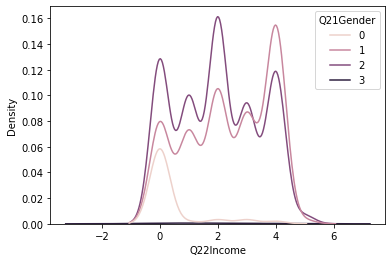

In [25]:
sns.kdeplot(x = data_2018['Q22Income'], hue = data_2018['Q21Gender'])

<AxesSubplot:xlabel='Q7WIFI', ylabel='Density'>

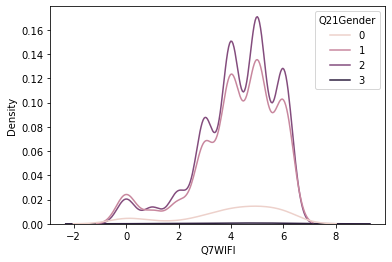

In [26]:
sns.kdeplot(x = data_2018['Q7WIFI'], hue = data_2018['Q21Gender'])

### New datasets

dataset with only numeric columns

In [27]:
# Select columns
data_2018_numeric = data_2018_num[columns_numeric_nn[columns_numeric_nn != 'WEIGHT']]
data_2018_numeric.head()

,AIRLINE_CODE,CCGID,DAY,DESTGEO,DESTMARK,DEST_CODE,FLIGHT,GATE,HOME,HOWLONG,...,Q9-1,Q9AirTrain,Q9All,Q9Boarding,Q9Food,Q9Rental,Q9Restroom,RESPNUM,SAQ,STRATA
0,29,1680,2,7,4,27,80,102,15,255.0,...,0,6,3,4,6,6,4,1842,2,3
1,29,1681,2,7,4,27,80,102,15,315.0,...,0,4,4,5,6,3,4,1844,2,3
2,29,1678,2,7,4,27,80,102,15,165.0,...,0,6,3,4,6,6,2,1840,1,3
3,29,1676,2,7,4,27,80,102,15,225.0,...,0,0,4,5,3,0,4,1837,1,3
4,29,1674,2,7,4,27,80,102,15,175.0,...,1,6,5,5,4,6,5,1833,2,3


In [28]:
data_2018_numeric.isnull().sum()

AIRLINE_CODE    0
CCGID           0
DAY             0
DESTGEO         0
DESTMARK        0
               ..
Q9Rental        0
Q9Restroom      0
RESPNUM         0
SAQ             0
STRATA          0
Length: 65, dtype: int64

dataset with expertly selected columns

In [29]:
columns_expert_2018 = ['DESTGEO', 'DEST_CODE', 'DESTMARK', 'Q2PURP1', 'HOWLONG', 'HOME', 'PEAK', 'METH', 'SAQ', 'Q10Safe', 'Q13GETRATE', 'Q14PASSTHRU', 'Q15PROBLEM', 'Q19Clear', 'Q22Income', 'Q4BAGS', 'Q4FOOD', 'Q4STORE', 'Q4WIFI', 'Q11TSAPRE', 'Q5TIMESFLOWN', 'Q5FIRSTTIME', 'Q6LONGUSE', 'Q23FLY', 'Q7ART', 'Q7FOOD', 'Q7STORE', 'Q7SIGN', 'Q7WALKWAY', 'Q7SCREENS', 'Q7INFODOWN', 'Q7INFOUP', 'Q7WIFI', 'Q7ROADS', 'Q7PARK', 'Q7AIRTRAIN', 'Q7LTPARKING', 'Q7RENTAL', 'Q8-1', 'NETPRO', 'Q9AirTrain', 'Q9All', 'Q9Boarding', 'Q9Food', 'Q9Rental', 'Q9Restroom', 'Q9-1']
data_2018_expert = data_2018[columns_expert_2018]
data_2018_expert.head()

#columns_expert_2016 = ['DESTGEO', 'DEST CODE', 'DESTMARK', 'HOWLONG', 'HOME', 'METHOD', 'PEAK', 'Q11TSAPRE', 'Q10SAFE', 'Q13GETRATE', 'Q14PASSTHRU', 'Q15PROBLEM', 'Q21INCME', 'Q22FLY', 'Q2PURP1', 'Q4BAGS', 'Q4FOOD', 'Q4STORE', 'Q4WIFI', 'Q5TIMESFLOWN', 'Q5FIRSTTIME', 'Q6LONGUSE', 'Q7ART', 'Q7FOOD', 'Q7STORE', 'Q7SIGN', 'Q7WALKWAYS', 'Q7SCREENS', 'Q7INFODOWN', 'Q7INFOUP', 'Q7WIFI', 'Q7ROADS', 'Q7PARK', 'Q7AIRTRAIN', 'Q7LTPARKING', 'Q7RENTAL', 'Q8COM', 'Q9AIRTRAIN', 'Q9ALL', 'Q9BOARDING', 'Q9FOOD', 'Q9RENTAL', 'Q9RESTROOM', 'Q9COM', 'SAQ']

,DESTGEO,DEST_CODE,DESTMARK,Q2PURP1,HOWLONG,HOME,PEAK,METH,SAQ,Q10Safe,...,Q7RENTAL,Q8-1,NETPRO,Q9AirTrain,Q9All,Q9Boarding,Q9Food,Q9Rental,Q9Restroom,Q9-1
0,7,27,4,2,255.0,15,3,1,2,3,...,6,0,5,6,3,4,6,6,4,0
1,7,27,4,2,315.0,15,3,1,2,4,...,2,0,7,4,4,5,6,3,4,0
2,7,27,4,5,165.0,15,3,1,1,4,...,6,0,7,6,3,4,6,6,2,0
3,7,27,4,3,225.0,15,3,1,1,4,...,0,0,8,0,4,5,3,0,4,0
4,7,27,4,4,175.0,15,3,1,2,3,...,0,11,8,6,5,5,4,6,5,1


## Standardised data

In [30]:
scaled_data_numeric = util.standarisation_data(data_2018_numeric)

In [31]:
scaled_data_expert = util.standarisation_data(data_2018_expert)

## KMeans

### Elbow plot

c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\

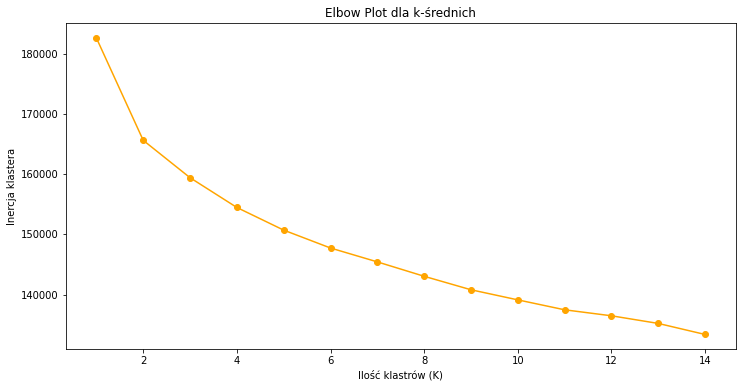

In [32]:
util.find_best_clusters(scaled_data_numeric, 15)

### Dendrogram

In [33]:
# Method - Ward
# clusters = hierarchy.linkage(scaled_data_numeric, method="ward")

In [34]:
# plt.figure(figsize=(8, 6))
# dendrogram = hierarchy.dendrogram(clusters, truncate_mode='lastp')
# plt.savefig('dendrogram.png', transparent = True)

### First trial of k-means on expert data with weights

In [35]:
util.kmeans_data(data_2018, scaled_data_numeric, 3, 'cl_3_numeric')

c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [44]:
def cluster_analysis(data_year, df_code, segment_name, cluster_num):
    data_part = data_year.loc[data_year[segment_name] == cluster_num]

    def mode(x):
        return pd.Series(x).value_counts().head(1).index[0]

    print('--- Cluster raport ---\n')
    print('Size of the cluster:', len(data_part))

    print('\n- Survey -')
    print('Mode day of interview:', util.create_dictionary(df_code, 'DAY')[mode(data_part['DAY'])])
    print('Mode method of collection:', util.create_dictionary(df_code, 'METH')[mode(data_part['METH'])])
    print('Mode survey administration:', util.create_dictionary(df_code, 'SAQ')[mode(data_part['SAQ'])])
    print('Mode language:', util.create_dictionary(df_code, 'LANG')[mode(data_part['LANG'])])

    print('\n- Flight -')
    print('Mode strata:', util.create_dictionary(df_code, 'STRATA')[mode(data_part['STRATA'])])
    print('Mode peak:', util.create_dictionary(df_code, 'PEAK')[mode(data_part['PEAK'])])
    print('Mode airline used:', util.create_dictionary(df_code, 'AIRLINE_CODE')[mode(data_part['AIRLINE_CODE'])])
    print('Mode destination:', util.create_dictionary(df_code, 'DESTGEO')[mode(data_part['DESTGEO'])])
    print('Mode market size of destination airport:', util.create_dictionary(df_code, 'DESTMARK')[mode(data_part['DESTMARK'])])
    print('Mean length of time from respondent arrival to flight departure:', round(np.average(data_part['HOWLONG'], weights=data_part['WEIGHT']), 2))
    print('Mode trip purpose:', util.create_dictionary(df_code, 'Q2PURP3', 2)[mode(data_part['Q2PURP1'])])
    print('Mode county left:', util.create_dictionary(df_code, 'Q13COUNTY')[mode(data_part['Q13COUNTY'])])

    print('\n- Transport -')
    print('Mode how get to SFO:', util.create_dictionary(df_code, 'Q3GETTO3', 2)[mode(data_part['Q3GETTO1'])])
    print('Mode park:', util.create_dictionary(df_code, 'Q3PARK')[mode(data_part['Q3PARK'])])

    print('\n- Airports -')
    print('Mode times flown out of SFO in a year:', util.create_dictionary(df_code, 'Q5TIMESFLOWN')[mode(data_part['Q5TIMESFLOWN'])])
    #print('Mode first time flying out of SFO:', util.create_dictionary(df_code, 'Q5FIRSTTIME')[mode(data_part['Q5FIRSTTIME'])])
    print('Mode time using SFO:', util.create_dictionary(df_code, 'Q6LONGUSE')[mode(data_part['Q6LONGUSE'])])
    print('Mode Clear membership:', util.create_dictionary(df_code, 'Q19Clear')[mode(data_part['Q19Clear'])])
    print('Mode fly more than 100k miles:', util.create_dictionary(df_code, 'Q23FLY')[mode(data_part['Q23FLY'])])
    print('Mode use of SJC:', util.create_dictionary(df_code, 'Q24SJC')[mode(data_part['Q24SJC'])])
    print('Mode use of OAK:', util.create_dictionary(df_code, 'Q24OAK')[mode(data_part['Q24OAK'])])

    print('\n- Use of services -')
    print('Mode TSA Pre-Check security line:', util.create_dictionary(df_code, 'Q11TSAPRE')[mode(data_part['Q11TSAPRE'])])
    q4_names = list(filter(re.compile(r'Q4\w*').fullmatch, data_part.columns.to_list()))
    for q4 in q4_names:
        print(f'Mode {q4}:', util.create_dictionary(df_code, 'Q4WIFI')[mode(data_part[q4])])
    print('Mode problem:', util.create_dictionary(df_code, 'Q15PROBLEM')[mode(data_part['Q15PROBLEM'])])

    print('\n- Rating -')
    q7_names = list(filter(re.compile(r'Q7\w*').fullmatch, data_part.columns.to_list()))
    q7_rating = [round(np.average(data_part[q7], weights=data_part['WEIGHT']), 2) for q7 in q7_names]
    print('Mean list satisfaction: ', q7_rating)
    print('Mean satisfaction:', round(np.average(q7_rating), 2))

    q9_names = list(filter(re.compile(r'Q9\w*').fullmatch, data_part.columns.to_list()))
    q9_rating = [round(np.average(data_part[q9], weights=data_part['WEIGHT']), 2) for q9 in q9_names]
    print('Mean list cleanliness: ', q9_rating)
    print('Mean cleanliness:', round(np.average(q9_rating), 2))

    print('Mean sense of safety:', round(np.average(data_part['Q10Safe'], weights=data_part['WEIGHT']), 2))
    print('Quartile 2 sense of safety:', data_part['Q10Safe'].quantile(0.5))
    print('Mode sense of safety:', mode(data_part['Q10Safe']))

    print('Mean TSA Pre-Check security line experience:', round(np.average(data_part['Q12PRECHECKRATE'], weights=data_part['WEIGHT']), 2))
    print('Mean ease get to:', round(np.average(data_part['Q13GETRATE'], weights=data_part['WEIGHT']), 2))
    print('Mean ease find way:', round(np.average(data_part['Q14FIND'], weights=data_part['WEIGHT']), 2))
    print('Mean ease pass through:', round(np.average(data_part['Q14PASSTHRU'], weights=data_part['WEIGHT']), 2))
    print('Mean recommendation (0-10):', round(np.average(data_part['NETPRO'], weights=data_part['WEIGHT']), 2))

    print('\n- Demographics -')
    print('Mode live:', util.create_dictionary(df_code, 'Q17LIVE')[mode(data_part['Q17LIVE'])])
    print('Mean age:', util.create_dictionary(df_code, 'Q20Age')[round(np.average(data_part['Q20Age'], weights=data_part['WEIGHT']), 0)])
    print('Quartile 2 age:', util.create_dictionary(df_code, 'Q20Age')[data_part['Q20Age'].quantile(0.5)])
    print('Mode gender:', util.create_dictionary(df_code, 'Q21Gender')[mode(data_part['Q21Gender'])])
    print('Mode income:', util.create_dictionary(df_code, 'Q22Income')[mode(data_part['Q22Income'])])
    print('Mean income:', util.create_dictionary(df_code, 'Q22Income')[round(np.average(data_part['Q22Income'], weights=data_part['WEIGHT']), 0)])
    print('Quartile 2 income:', util.create_dictionary(df_code, 'Q22Income')[data_part['Q22Income'].quantile(0.5)])


In [45]:
cluster_analysis(data_2018, code_list_2018, 'cl_3_numeric', 1)

--- Cluster raport ---

Size of the cluster: 185

- Survey -
Mode day of interview: Tuesday
Mode method of collection: At gate
Mode survey administration: Self Administered 
Mode language: English

- Flight -
Mode strata: MID (Flights departing 11 am to 5 pm)
Mode peak: International flights
Mode airline used: UNITED
Mode destination: United States – West  (AK, HI, western and most of mountain time zone)
Mode market size of destination airport: Hub – 100,000 passengers/day or more
Mean length of time from respondent arrival to flight departure: 182.34
Mode trip purpose: Pleasure/Vacation/Recreation
Mode county left: Not applicable – connecting from another flight

- Transport -
Mode how get to SFO: Connecting from another flight
Mode park: Blank/Multiple responses

- Airports -
Mode times flown out of SFO in a year: 1 time
Mode time using SFO: 10+ years
Mode Clear membership: No 
Mode fly more than 100k miles: No
Mode use of SJC: No
Mode use of OAK: No

- Use of services -
Mode TSA Pre

<AxesSubplot:xlabel='PEAK', ylabel='Count'>

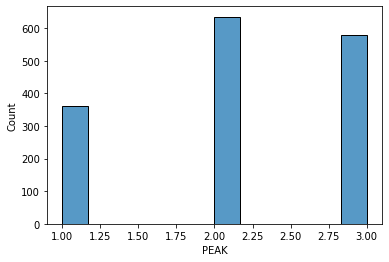

In [107]:
plt.figure()
sns.histplot(data_2018.loc[data_2018['cl_3_numeric'] == 2].PEAK)

<AxesSubplot:xlabel='PEAK', ylabel='Density'>

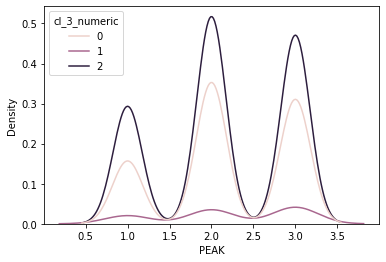

In [108]:
sns.kdeplot(x = data_2018['PEAK'], hue = data_2018['cl_3_numeric'])

In [109]:
a = data_2018.loc[data_2018['cl_3_numeric'] == 1].groupby('Q8-1')['Q8-1'].count()
a[a>20]

Q8-1
0    132
Name: Q8-1, dtype: int64

In [110]:
a = data_2018.loc[data_2018['cl_3_numeric'] == 0].Q7STORE
a = a[a > 0]
np.mean(a[a < 6])

3.2643080124869925

In [111]:
b = data_2018.loc[data_2018['cl_3_numeric'] == 0]
sorted(pd.unique(b['Q8-1']))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 31,
 32,
 33,
 34,
 35,
 36,
 41,
 42,
 44,
 45,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 63,
 64,
 65,
 67,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 101,
 102,
 103,
 104,
 105,
 107,
 108,
 110,
 151,
 152,
 153,
 201,
 202,
 203,
 204,
 205,
 206,
 210,
 211,
 212,
 501,
 502,
 504,
 505,
 510,
 802,
 803,
 804,
 805,
 806,
 991,
 992,
 993,
 994]

## Decision Tree

In [112]:
X_train, X_test, y_train, y_test = train_test_split(data_2018_numeric,
                                                    data_2018.cl_3_numeric, test_size=0.3, random_state=1)

In [113]:
clf = DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)

In [114]:
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8102016607354685


In [115]:
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\\bin'

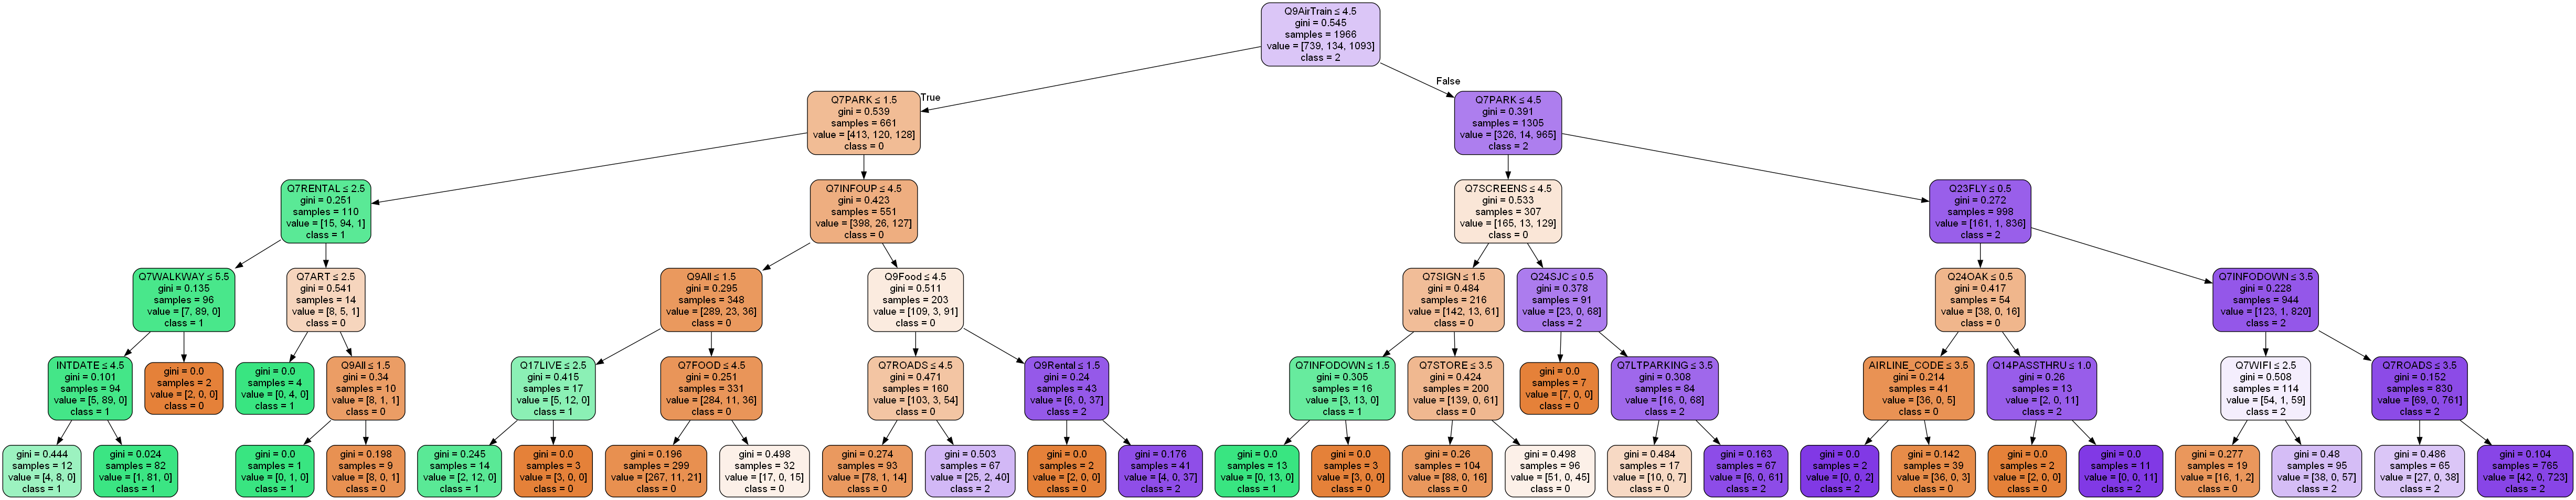

In [116]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = data_2018_numeric.columns,
                class_names=['0', '1', '2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree_graph.png')
Image(graph.create_png())

In [117]:
text_representation = tree.export_text(clf, feature_names=data_2018_numeric.columns)
print(text_representation)

|--- Q9AirTrain <= 4.50
|   |--- Q7PARK <= 1.50
|   |   |--- Q7RENTAL <= 2.50
|   |   |   |--- Q7WALKWAY <= 5.50
|   |   |   |   |--- INTDATE <= 4.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- INTDATE >  4.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Q7WALKWAY >  5.50
|   |   |   |   |--- class: 0
|   |   |--- Q7RENTAL >  2.50
|   |   |   |--- Q7ART <= 2.50
|   |   |   |   |--- class: 1
|   |   |   |--- Q7ART >  2.50
|   |   |   |   |--- Q9All <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Q9All >  1.50
|   |   |   |   |   |--- class: 0
|   |--- Q7PARK >  1.50
|   |   |--- Q7INFOUP <= 4.50
|   |   |   |--- Q9All <= 1.50
|   |   |   |   |--- Q17LIVE <= 2.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Q17LIVE >  2.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Q9All >  1.50
|   |   |   |   |--- Q7FOOD <= 4.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Q7FOOD >  4.50
|   |   |   |   |   |--- class: 0
|   |   |--- Q7INFOUP 

In [118]:
key_feature = pd.unique(util.used_feature(_tree, clf, data_2018_numeric.columns))
key_feature

array(['Q9AirTrain', 'Q7PARK', 'Q7RENTAL', 'Q7WALKWAY', 'INTDATE',
       'Q7ART', 'Q9All', 'Q7INFOUP', 'Q17LIVE', 'Q7FOOD', 'Q9Food',
       'Q7ROADS', 'Q9Rental', 'Q7SCREENS', 'Q7SIGN', 'Q7INFODOWN',
       'Q7STORE', 'Q24SJC', 'Q7LTPARKING', 'Q23FLY', 'Q24OAK',
       'AIRLINE_CODE', 'Q14PASSTHRU', 'Q7WIFI'], dtype=object)

## K-means with key features

In [119]:
data_2018_tree = data_2018_numeric[key_feature]
scaled_data_tree = util.standarisation_data(data_2018_tree)

In [120]:
util.kmeans_data(data_2018, scaled_data_tree, 3, 'cl_3_tree')

c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [121]:
data_2018.loc[data_2018['cl_3_tree'] == 0].describe()

,RESPNUM,CCGID,INTDATE,DAY,GATE,STRATA,PEAK,METH,SAQ,FLIGHT,...,Q20Age,Q21Gender,Q22Income,Q23FLY,Q24SJC,Q24OAK,LANG,WEIGHT,cl_3_numeric,cl_3_tree
count,1791.000000,1791.000000,1791.000000,1791.000000,1791.000000,1791.000000,1791.000000,1791.000000,1791.000000,1791.000000,...,1791.000000,1791.000000,1791.000000,1791.000000,1791.000000,1791.000000,1791.000000,1791.000000,1791.000000,1791.0
mean,1821.735902,1421.619765,13.951982,4.074260,52.074819,2.146287,2.140145,1.013400,1.831379,1416.357342,...,4.105528,1.499721,2.035176,1.920715,1.733668,1.681742,1.099944,1.018811,1.723060,0.0
std,936.356801,854.290859,8.254400,1.712446,32.713296,0.788773,0.751841,0.128764,0.374521,1704.522024,...,1.742511,0.560202,1.435539,0.585076,0.557308,0.593537,0.428789,0.495460,0.690978,0.0
min,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.208038,0.000000,0.0
25%,1059.000000,697.000000,6.000000,3.000000,22.000000,2.000000,2.000000,1.000000,2.000000,414.000000,...,3.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.670484,2.000000,0.0
50%,1854.000000,1422.000000,15.000000,4.000000,54.000000,2.000000,2.000000,1.000000,2.000000,869.000000,...,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.106332,2.000000,0.0
75%,2609.500000,2118.500000,20.000000,5.000000,81.000000,3.000000,3.000000,1.000000,2.000000,1703.000000,...,6.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.486925,2.000000,0.0
max,9004.000000,9004.000000,31.000000,7.000000,102.000000,3.000000,3.000000,3.000000,2.000000,8839.000000,...,7.000000,3.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.887528,2.000000,0.0


In [122]:
data_2018.loc[data_2018['cl_3_tree'] == 1].describe()

,RESPNUM,CCGID,INTDATE,DAY,GATE,STRATA,PEAK,METH,SAQ,FLIGHT,...,Q20Age,Q21Gender,Q22Income,Q23FLY,Q24SJC,Q24OAK,LANG,WEIGHT,cl_3_numeric,cl_3_tree
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.0,131.000000,131.000000,...,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.0
mean,1838.061069,1422.419847,14.526718,4.022901,51.351145,2.160305,2.129771,1.0,1.954198,1201.763359,...,4.114504,1.244275,1.374046,1.450382,1.358779,1.236641,1.175573,1.048056,0.984733,1.0
std,938.700933,822.898302,8.427362,1.633616,34.100964,0.742312,0.758510,0.0,0.209857,1513.597339,...,2.454638,0.755407,1.590045,0.938196,0.877660,0.875584,0.518592,0.554618,0.123084,0.0
min,8.000000,26.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.208038,0.000000,1.0
25%,902.000000,701.500000,8.000000,3.000000,11.000000,2.000000,2.000000,1.0,2.000000,308.500000,...,3.000000,1.000000,0.000000,1.000000,0.500000,0.000000,1.000000,0.670484,1.000000,1.0
50%,2023.000000,1306.000000,16.000000,4.000000,54.000000,2.000000,2.000000,1.0,2.000000,754.000000,...,5.000000,1.000000,0.000000,2.000000,2.000000,2.000000,1.000000,1.106332,1.000000,1.0
75%,2592.000000,2198.000000,20.000000,5.000000,82.000000,3.000000,3.000000,1.0,2.000000,1363.500000,...,6.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.486925,1.000000,1.0
max,3280.000000,2752.000000,31.000000,7.000000,102.000000,3.000000,3.000000,1.0,2.000000,8839.000000,...,7.000000,3.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.887528,1.000000,1.0


In [123]:
data_2018.loc[data_2018['cl_3_tree'] == 2].describe()

,RESPNUM,CCGID,INTDATE,DAY,GATE,STRATA,PEAK,METH,SAQ,FLIGHT,...,Q20Age,Q21Gender,Q22Income,Q23FLY,Q24SJC,Q24OAK,LANG,WEIGHT,cl_3_numeric,cl_3_tree
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,...,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.0
mean,1819.963923,1413.412627,14.269448,4.250282,47.660654,2.149944,2.210823,1.012401,1.968433,1443.630214,...,3.914318,1.375423,2.170237,1.661781,1.351747,1.302142,1.100338,0.954916,0.130778,2.0
std,956.849325,881.837031,8.036640,1.656929,34.002338,0.771280,0.744867,0.129522,0.174943,1762.943975,...,1.992505,0.671900,1.566903,0.817786,0.783762,0.779988,0.455800,0.468840,0.426056,0.0
min,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.208038,0.000000,2.0
25%,1064.500000,726.500000,8.500000,3.000000,10.500000,2.000000,2.000000,1.000000,2.000000,371.500000,...,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.670484,0.000000,2.0
50%,1878.000000,1389.000000,15.000000,4.000000,50.000000,2.000000,2.000000,1.000000,2.000000,794.000000,...,4.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.994275,0.000000,2.0
75%,2563.500000,2095.500000,20.000000,5.000000,80.000000,3.000000,3.000000,1.000000,2.000000,1798.000000,...,5.500000,2.000000,4.000000,2.000000,2.000000,2.000000,1.000000,1.178946,0.000000,2.0
max,9003.000000,9003.000000,31.000000,7.000000,102.000000,3.000000,3.000000,3.000000,2.000000,8839.000000,...,7.000000,3.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.887528,2.000000,2.0


In [124]:
data_2018.loc[data_2018['cl_3_tree'] == 1].groupby('Q13COUNTY')['Q13COUNTY'].count()

Q13COUNTY
0     36
1     11
2      6
3      3
4      1
5     26
6      3
7      7
8      1
9      2
11    31
19     1
27     1
29     1
30     1
Name: Q13COUNTY, dtype: int64

<AxesSubplot:xlabel='Q13COUNTY', ylabel='Density'>

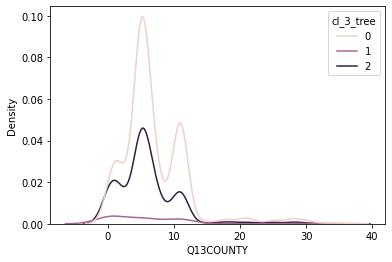

In [125]:
sns.kdeplot(x = data_2018['Q13COUNTY'], hue = data_2018['cl_3_tree'])

In [126]:
a = data_2018.loc[data_2018['cl_3_tree'] == 2].Q10Safe
a = a[a > 0]
np.mean(a[a < 6])

4.16588785046729

### PCA

In [127]:
from sklearn.decomposition import PCA

In [128]:
pca_data = PCA(n_components=len(data_2018_numeric.columns))
principalComponents = pca_data.fit_transform(scaled_data_numeric)

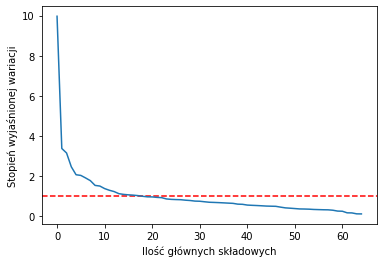

In [129]:
plt.axhline(y=1, color='r', linestyle='--')
plt.xlabel('Ilość głównych składowych')
plt.ylabel('Stopień wyjaśnionej wariacji')
plt.plot(pca_data.explained_variance_)
plt.savefig('kaiser.png', transparent=True)
plt.show()

In [130]:
pca_data = PCA(n_components=20)
principalComponents = pca_data.fit_transform(scaled_data_numeric)

print('Explained variation per principal component: {}'.format(pca_data.explained_variance_ratio_))

Explained variation per principal component: [0.15333854 0.05189817 0.04843826 0.03782757 0.03175387 0.03123654
 0.02929802 0.02722221 0.0235608  0.02306475 0.02111425 0.01977887
 0.01879429 0.01716554 0.016575   0.01620217 0.01597041 0.0155687
 0.0148662  0.01444924]


In [131]:
sum(pca_data.explained_variance_ratio_)

0.628123391930586

In [132]:
data_2018_pca = pd.DataFrame(data = principalComponents,
                             columns = ['principal_component'+str(i) for i in range(1, 21)])
data_2018_pca.head()

,principal_component1,principal_component2,principal_component3,principal_component4,principal_component5,principal_component6,principal_component7,principal_component8,principal_component9,principal_component10,principal_component11,principal_component12,principal_component13,principal_component14,principal_component15,principal_component16,principal_component17,principal_component18,principal_component19,principal_component20
0,-0.675862,1.425783,2.517944,0.329020,0.212744,-0.267161,-0.853660,-0.264380,0.680168,-1.662045,0.655252,0.819383,-0.999565,-1.500033,-0.176256,1.150422,-0.416523,0.466191,0.003559,1.697400
1,-0.355423,0.600424,2.534041,0.190391,0.222184,1.943204,0.322801,2.012134,-1.421052,0.160039,0.211701,2.201109,-1.211378,0.571120,0.084725,1.330119,-1.132807,0.411028,0.486109,0.805868
2,-1.744038,0.900925,1.713352,-2.809682,-1.394561,2.372034,0.568901,0.724901,0.176969,-0.382332,0.485447,0.676038,-1.131735,0.694435,1.120809,2.494200,-1.062326,1.560436,-1.201355,1.964430
3,6.999046,-1.009041,2.016343,2.595968,0.960287,2.749288,-0.127453,2.099754,-1.080128,-0.341296,3.395936,-0.114227,-1.687678,0.916648,-0.220839,1.728478,-1.268061,-1.678047,-2.959778,-0.668488
4,8.077884,-3.365939,2.391963,0.624079,-3.392817,-2.559776,3.460794,1.406060,0.783261,-1.431418,2.312372,-0.108889,-0.583204,1.099902,0.270630,2.214167,-1.423946,-1.298952,0.193065,0.270845


In [133]:
util.kmeans_data(data_2018, data_2018_pca, 3, 'cl_3_pca')

c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [134]:
data_2018.loc[data_2018['cl_3_pca'] == 0].describe()

,RESPNUM,CCGID,INTDATE,DAY,GATE,STRATA,PEAK,METH,SAQ,FLIGHT,...,Q21Gender,Q22Income,Q23FLY,Q24SJC,Q24OAK,LANG,WEIGHT,cl_3_numeric,cl_3_tree,cl_3_pca
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,...,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.0
mean,1825.648915,1443.194280,14.538462,4.271203,47.007890,2.160750,2.187377,1.012821,1.965483,1477.287968,...,1.364892,2.300789,1.689349,1.379684,1.335306,1.088757,0.962944,0.018738,1.590730,0.0
std,966.416508,871.924665,8.185775,1.655533,33.299531,0.773958,0.738451,0.128908,0.182642,1764.485197,...,0.655292,1.579502,0.801741,0.761112,0.752748,0.426205,0.471638,0.173927,0.805431,0.0
min,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.208038,0.000000,0.000000,0.0
25%,1022.000000,754.000000,9.000000,3.000000,11.000000,2.000000,2.000000,1.000000,2.000000,390.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.670484,0.000000,2.000000,0.0
50%,1914.000000,1424.000000,15.000000,4.000000,48.000000,2.000000,2.000000,1.000000,2.000000,841.000000,...,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.061139,0.000000,2.000000,0.0
75%,2601.500000,2154.000000,20.000000,5.000000,74.000000,3.000000,3.000000,1.000000,2.000000,1799.000000,...,2.000000,4.000000,2.000000,2.000000,2.000000,1.000000,1.178946,0.000000,2.000000,0.0
max,9003.000000,9003.000000,31.000000,7.000000,102.000000,3.000000,3.000000,3.000000,2.000000,8839.000000,...,3.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.887528,2.000000,2.000000,0.0


In [135]:
data_2018.loc[data_2018['cl_3_pca'] == 1].describe()

,RESPNUM,CCGID,INTDATE,DAY,GATE,STRATA,PEAK,METH,SAQ,FLIGHT,...,Q21Gender,Q22Income,Q23FLY,Q24SJC,Q24OAK,LANG,WEIGHT,cl_3_numeric,cl_3_tree,cl_3_pca
count,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,...,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.0
mean,1822.734075,1407.129252,13.782313,4.046382,52.734694,2.134199,2.137910,1.013605,1.817563,1405.047619,...,1.529375,1.976500,1.943723,1.764378,1.709957,1.101422,1.019374,1.938157,0.039579,1.0
std,931.083200,858.181994,8.184649,1.712924,32.783278,0.792867,0.756264,0.130926,0.386323,1705.650596,...,0.542075,1.396403,0.543799,0.528418,0.575366,0.427524,0.496953,0.346317,0.278640,0.0
min,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.208038,0.000000,0.000000,1.0
25%,1080.000000,683.000000,6.000000,3.000000,23.000000,1.000000,2.000000,1.000000,2.000000,412.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.670484,2.000000,0.000000,1.0
50%,1845.000000,1401.000000,15.000000,4.000000,54.000000,2.000000,2.000000,1.000000,2.000000,869.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.106332,2.000000,0.000000,1.0
75%,2594.000000,2087.000000,19.000000,5.000000,81.000000,3.000000,3.000000,1.000000,2.000000,1703.000000,...,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.486925,2.000000,0.000000,1.0
max,9004.000000,9004.000000,31.000000,7.000000,102.000000,3.000000,3.000000,3.000000,2.000000,8839.000000,...,3.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.887528,2.000000,2.000000,1.0


In [136]:
data_2018.loc[data_2018['cl_3_pca'] == 2].describe()

,RESPNUM,CCGID,INTDATE,DAY,GATE,STRATA,PEAK,METH,SAQ,FLIGHT,...,Q21Gender,Q22Income,Q23FLY,Q24SJC,Q24OAK,LANG,WEIGHT,cl_3_numeric,cl_3_tree,cl_3_pca
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.0,178.000000,178.000000,...,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.0,178.000000,178.0
mean,1793.561798,1390.044944,14.157303,4.044944,52.415730,2.202247,2.235955,1.0,1.966292,1149.971910,...,1.191011,1.241573,1.393258,1.292135,1.179775,1.207865,1.035079,1.0,1.280899,2.0
std,914.373250,830.802606,8.239904,1.676761,35.387383,0.707982,0.759460,0.0,0.180985,1478.693783,...,0.793710,1.500682,0.992833,0.910730,0.908986,0.616666,0.532807,0.0,0.450706,0.0
min,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.208038,1.0,1.000000,2.0
25%,933.000000,648.250000,8.000000,3.000000,9.000000,2.000000,2.000000,1.0,2.000000,284.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.670484,1.0,1.000000,2.0
50%,1872.000000,1384.000000,16.000000,4.000000,56.500000,2.000000,2.000000,1.0,2.000000,752.000000,...,1.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.106332,1.0,1.000000,2.0
75%,2542.750000,2136.500000,20.000000,5.000000,87.000000,3.000000,3.000000,1.0,2.000000,1272.750000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.486925,1.0,2.000000,2.0
max,3280.000000,2782.000000,31.000000,7.000000,102.000000,3.000000,3.000000,1.0,2.000000,8839.000000,...,3.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.887528,1.0,2.000000,2.0


In [147]:
data_2018_tree.columns

Index(['Q9AirTrain', 'Q7PARK', 'Q7RENTAL', 'Q7WALKWAY', 'INTDATE', 'Q7ART',
       'Q9All', 'Q7INFOUP', 'Q17LIVE', 'Q7FOOD', 'Q9Food', 'Q7ROADS',
       'Q9Rental', 'Q7SCREENS', 'Q7SIGN', 'Q7INFODOWN', 'Q7STORE', 'Q24SJC',
       'Q7LTPARKING', 'Q23FLY', 'Q24OAK', 'AIRLINE_CODE', 'Q14PASSTHRU',
       'Q7WIFI'],
      dtype='object')

In [146]:
np.setdiff1d(data_2018_numeric.columns, data_2018_expert.columns)

array(['AIRLINE_CODE', 'CCGID', 'DAY', 'FLIGHT', 'GATE', 'INTDATE',
       'LANG', 'Q10-1', 'Q13COUNTY', 'Q14FIND', 'Q17LIVE', 'Q20Age',
       'Q21Gender', 'Q24OAK', 'Q24SJC', 'Q3GETTO1', 'RESPNUM', 'STRATA'],
      dtype=object)

In [ ]:
data_2018_expert.columns